<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_2X/blob/main/GQtest_cluster_groupwise_(y_hat)_0_5_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_2X/groupwise_0.5_type_I _error'

In [4]:
os.listdir(base_path)

['data_groupwise_0.5_n250.csv',
 'data_groupwise_0.5_n120.csv',
 'data_groupwise_0.5_n60.csv',
 'data_groupwise_0.5_n30.csv',
 'data_groupwise_0.5_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.5_n250.csv')

In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,-0.924980,136.636693,137.586084,-0.949391
1,0.0,1.0,57.329540,88.266135,0.043047,155.638722,155.658161,-0.019439
2,0.0,2.0,45.215694,22.043105,-1.115502,76.143296,77.113063,-0.969766
3,0.0,3.0,69.375325,71.150993,1.442776,151.969095,150.584167,1.384927
4,0.0,4.0,87.837297,47.725671,-1.202881,144.360086,145.620870,-1.260783
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,98.330395,73.668159,-0.433690,181.564863,182.108449,-0.543586
249996,999.0,246.0,94.959135,43.787704,1.019669,149.766509,148.828678,0.937831
249997,999.0,247.0,84.253583,80.925317,-0.316474,174.862426,175.291543,-0.429117
249998,999.0,248.0,92.666128,49.627275,-0.068221,152.225182,152.379919,-0.154737


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  58.707153 -0.924980  136.636693  137.586084 -0.949391
      1.0    57.329540  88.266135  0.043047  155.638722  155.658161 -0.019439
      2.0    45.215694  22.043105 -1.115502   76.143296   77.113063 -0.969766
      3.0    69.375325  71.150993  1.442776  151.969095  150.584167  1.384927
      4.0    87.837297  47.725671 -1.202881  144.360086  145.620870 -1.260783
...                ...        ...       ...         ...         ...       ...
999.0 245.0  98.330395  73.668159 -0.433690  181.564863  182.108449 -0.543586
      246.0  94.959135  43.787704  1.019669  149.766509  148.828678  0.937831
      247.0  84.253583  80.925317 -0.316474  174.862426  175.291543 -0.429117
      248.0  92.666128  49.627275 -0.068221  152.225182  152.379919 -0.154737
      249.0  57.143777  39.659980  0.457693  107.261450  106.871521  0.389929

[250000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  58.707153 -0.924980  136.636693  137.586084 -0.949391
      1.0    57.329540  88.266135  0.043047  155.638722  155.658161 -0.019439
      2.0    45.215694  22.043105 -1.115502   76.143296   77.113063 -0.969766
      3.0    69.375325  71.150993  1.442776  151.969095  150.584167  1.384927
      4.0    87.837297  47.725671 -1.202881  144.360086  145.620870 -1.260783
...                ...        ...       ...         ...         ...       ...
999.0 245.0  98.330395  73.668159 -0.433690  181.564863  182.108449 -0.543586
      246.0  94.959135  43.787704  1.019669  149.766509  148.828678  0.937831
      247.0  84.253583  80.925317 -0.316474  174.862426  175.291543 -0.429117
      248.0  92.666128  49.627275 -0.068221  152.225182  152.379919 -0.154737
      249.0  57.143777  39.659980  0.457693  107.261450  106.871521  0.389929

[250000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.854520,58.707153,-0.924980,136.636693,137.586084,-0.949391
1,0.0,1.0,57.329540,88.266135,0.043047,155.638722,155.658161,-0.019439
2,0.0,2.0,45.215694,22.043105,-1.115502,76.143296,77.113063,-0.969766
3,0.0,3.0,69.375325,71.150993,1.442776,151.969095,150.584167,1.384927
4,0.0,4.0,87.837297,47.725671,-1.202881,144.360086,145.620870,-1.260783
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,98.330395,73.668159,-0.433690,181.564863,182.108449,-0.543586
249996,999.0,246.0,94.959135,43.787704,1.019669,149.766509,148.828678,0.937831
249997,999.0,247.0,84.253583,80.925317,-0.316474,174.862426,175.291543,-0.429117
249998,999.0,248.0,92.666128,49.627275,-0.068221,152.225182,152.379919,-0.154737


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.854520  58.707153 -0.924980  136.636693  137.586084 -0.949391
      1.0    57.329540  88.266135  0.043047  155.638722  155.658161 -0.019439
      2.0    45.215694  22.043105 -1.115502   76.143296   77.113063 -0.969766
      3.0    69.375325  71.150993  1.442776  151.969095  150.584167  1.384927
      4.0    87.837297  47.725671 -1.202881  144.360086  145.620870 -1.260783
...                ...        ...       ...         ...         ...       ...
999.0 245.0  98.330395  73.668159 -0.433690  181.564863  182.108449 -0.543586
      246.0  94.959135  43.787704  1.019669  149.766509  148.828678  0.937831
      247.0  84.253583  80.925317 -0.316474  174.862426  175.291543 -0.429117
      248.0  92.666128  49.627275 -0.068221  152.225182  152.379919 -0.154737
      249.0  57.143777  39.659980  0.457693  107.261450  106.871521  0.389929

[250000 rows x 6 columns]

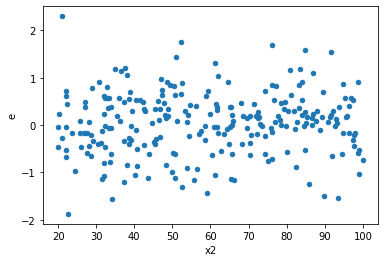

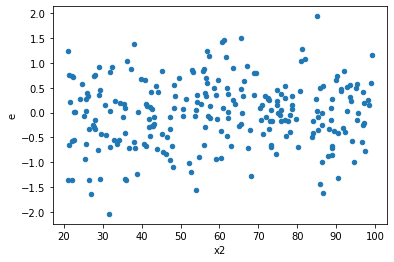

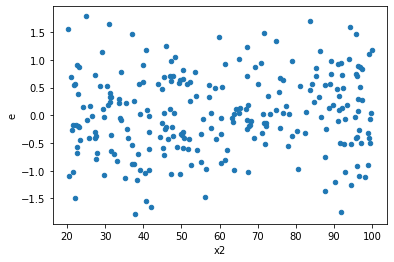

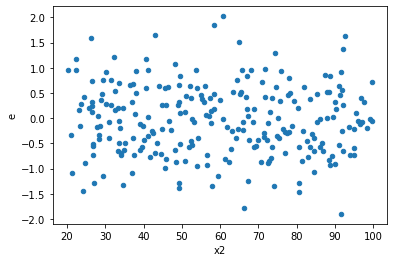

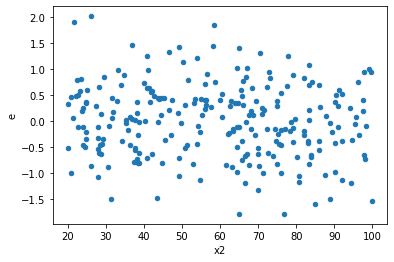

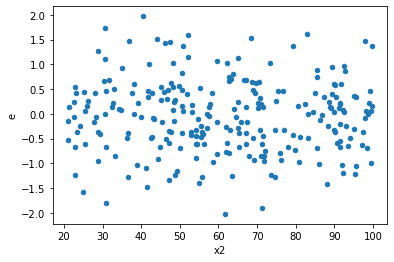

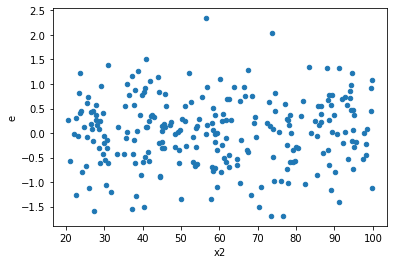

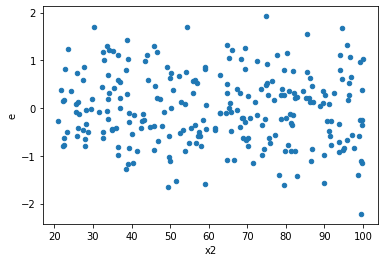

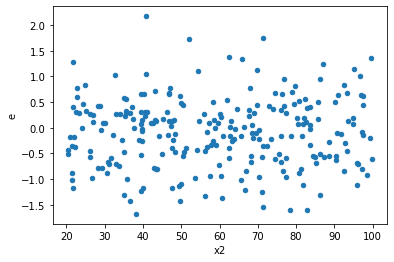

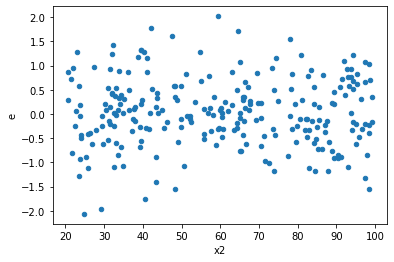

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,145.0,101.0,68.85294721602648,51.083878525917164,0.47484791183466535,0.5057809755041304,1.065143097186527,0.7398958872138379,0.630052056393081,0.36994794360691896,Reject005=1 : Homoscedasticity
1.0,130.0,116.0,56.02750130928981,60.325179880823136,0.43098077930222933,0.520044654145027,1.2066539370665084,0.3021401671841806,0.8489299164079097,0.1510700835920903,Reject005=1 : Homoscedasticity
2.0,123.0,123.0,55.31392087616008,69.92727284653333,0.44970667378991935,0.5685144133864498,1.2641894072758002,0.19502159430886312,0.9024892028455684,0.09751079715443156,Reject005=1 : Homoscedasticity
3.0,131.0,115.0,61.92885360630763,57.31367123069851,0.47273934050616506,0.49837974983216093,1.054237942834507,0.7736759462490603,0.6131620268754698,0.38683797312453017,Reject005=1 : Homoscedasticity
5.0,118.0,128.0,55.37753432759401,63.75157025352653,0.46930113836944076,0.498059142605676,1.061278360278761,0.7403310966517997,0.6298344516741001,0.3701655483258999,Reject005=1 : Homoscedasticity
6.0,123.0,123.0,59.24608311086255,61.689983152526764,0.481675472446037,0.5015445784758273,1.041249985034304,0.823000427306499,0.5884997863467505,0.4115002136532495,Reject005=1 : Homoscedasticity
8.0,116.0,130.0,56.35194990988144,75.50230480389908,0.485792671636909,0.580786960029993,1.1955449185204765,0.32157369177729844,0.8392131541113508,0.16078684588864922,Reject005=1 : Homoscedasticity
10.0,137.0,109.0,54.52553015308058,50.2673088759187,0.3979965704604422,0.4611679713387037,1.158723480469137,0.4234502938355911,0.7882748530822045,0.21172514691779554,Reject005=1 : Homoscedasticity
13.0,127.0,119.0,61.20282260584414,57.94280462462916,0.4819119890223948,0.48691432457671563,1.010380184905689,0.9560140989497627,0.5219929505251186,0.4780070494748814,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,145.0,101.0,68.85294721602648,51.083878525917164,0.47484791183466535,0.5057809755041304,1.065143097186527,0.7398958872138379,Reject005=1 : Homoscedasticity
1.0,130.0,116.0,56.02750130928981,60.325179880823136,0.43098077930222933,0.520044654145027,1.2066539370665084,0.3021401671841806,Reject005=1 : Homoscedasticity
2.0,123.0,123.0,55.31392087616008,69.92727284653333,0.44970667378991935,0.5685144133864498,1.2641894072758002,0.19502159430886312,Reject005=1 : Homoscedasticity
3.0,131.0,115.0,61.92885360630763,57.31367123069851,0.47273934050616506,0.49837974983216093,1.054237942834507,0.7736759462490603,Reject005=1 : Homoscedasticity
4.0,117.0,129.0,51.60009592619249,55.0997319762166,0.4410264609076281,0.4271297052419892,0.9684899730573092,0.8618789795462697,Reject005=1 : Homoscedasticity
5.0,118.0,128.0,55.37753432759401,63.75157025352653,0.46930113836944076,0.498059142605676,1.061278360278761,0.7403310966517997,Reject005=1 : Homoscedasticity
6.0,123.0,123.0,59.24608311086255,61.689983152526764,0.481675472446037,0.5015445784758273,1.041249985034304,0.823000427306499,Reject005=1 : Homoscedasticity
7.0,112.0,134.0,55.01910672580485,61.054280737614945,0.4912420243375433,0.45562896072846976,0.9275040370230967,0.6826198486508613,Reject005=1 : Homoscedasticity
8.0,116.0,130.0,56.35194990988144,75.50230480389908,0.485792671636909,0.580786960029993,1.1955449185204765,0.32157369177729844,Reject005=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      956
Reject005=0 : Heteroscedasticity     44
Name: Result_test, dtype: int64